## Interpolation
There are various way of doing interpolation. Commonly used methods are piecewise linear and
non-linear, splines, and radial basis functions. In this section, we will use piecewise linear and
radial basis function to interpolate the data.

We will first generate few data points having exponential relationship. Then we will interpolate
using interp1d function of scipy.interpolate library. This function returns an object, which
can be used later to evaluate the fitted piecewise linear curve at required data points.

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.interpolate import interp1d

In [2]:
# generate data
x = np.linspace(0,1,5)
y = np.exp(-x)
f = interp1d(x, y)
xnew = np.linspace(x.min(), x.max())
ynew = f(xnew) # use interpolation function returned by `interp1d`

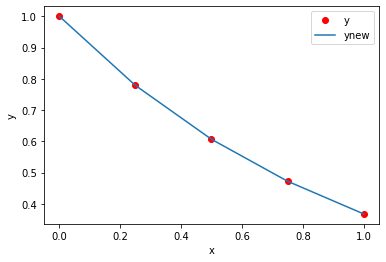

In [3]:
# plot
plt.plot(x, y, 'ro', label='y')
plt.plot(xnew, ynew, '-', label='ynew')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.savefig('interpol_1d.png')

The inerp1d does not do extrapolation i.e. it will issue an error if we want to fit the data outside
input data range. We can suppress the error by specifying the bounds_error=None argument. In
this case, it will give nan, if we want to interpolate outside input data range. To interpolate outside
the input data range, we can use Rbf function of the scipy.interpolate library. We will use Rbf
function to interpolate outside these range. We are using plt.imshow to make the 2D plot. 
It is clear from the procedure below, that it is able to interpolate outside input data range
also.

In [4]:
#interpolate outside input data range - 2d
from scipy import interpolate
x = np.random.rand(5)
y = np.random.rand(5)
pet = 2+2*np.random.rand(5)

rbfi = interpolate.Rbf(x, y, pet) # radial basis function interpolation instance

xi = np.linspace(0,1)
yi = np.linspace(0,1)
XI, YI = np.meshgrid(xi,yi) # gridded locations

di = rbfi(XI, YI) # interpolated values

(0.0, 1.0, 0.0, 1.0)

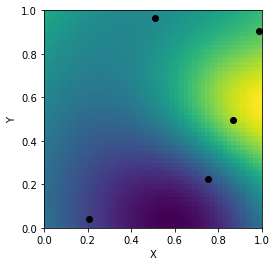

In [5]:
#create plot
plt.imshow(di, extent=(0,1,0,1), origin='lower')
plt.scatter(x,y, color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis((0,1,0,1))
#plt.savefig('interpol_2d.png')

## Linear regression
Linear regression is an approach to model the relationship between two variables using linear function.
We will use st.linregress function to perform linear regression. We will first generate some
synthetic data using a known linear model, and will also add some noise using normally distributed
random variable. linregress provides correlation, p-value, and standard error of estimate apart
from model coefficients.

In [6]:
# linear regression
# generate the data
n = 100 # length of the data
x = np.random.rand(n)
y = 3 + 7*x + np.random.randn(n)

In [7]:
# perform linear regression
b, a, r, p, e = st.linregress(x, y)
print(a,b)

2.7088471927137188 7.385236085049688


We generated data using linear model (y = 3+7x+$\epsilon$), while linear regression (y = a + b*x). The difference in the fitted model and true model, is because of the noise. As you add more noise, you will see that the fitted model departs more from the reality. The figure below (once the code has been executed) shows the true line (y = 3+7x), corrupted measurement (y = 3+7x+$\epsilon$), fitted line (y = a + b*x), and prediction
interval for the fitted line. The fitted line and true line are matching reasonably. The prediction interval are also quiet reasonable. 

The variance of a predicted Y<sub>pred</sub> is given by:


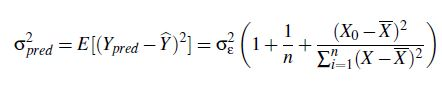



Where, the σ²$\epsilon$ is estimated by s<sup>2</sup> the classic unbiased estimator of the residual variance. The σ²<sub>pred</sub> is used to generate prediction interval using a Students t distribution with n-2 degrees of freedom (because s<sup>2</sup> is an estimator). The confidence interval around Y<sub>pred</sub> is given by:

PI = σ<sub>pred</sub> * *z* 

where, PI is the prediction interval, *z* is the value of Students *t* distribution at $\alpha$ significance level.


In [8]:
eps = y - a - b*x # error of fitting and measured data
x1 = np.linspace(0, 1) # x axis to plot the PI

In [9]:
# variace of fitting error
e_pi = np.var(eps)*(1+1.0/n + (x1-x.mean())**2/np.sum((x-x.mean())**2))

In [10]:
# z value using the t distribution and with dof = n-2
z = st.t.ppf(0.95, n-2)

In [11]:
# prediction interval
pi = np.sqrt(e_pi)*z
zl = st.t.ppf(0.10, n-2) # z at 0.1
zu = st.t.ppf(0.90, n-2) # z at 0.9
ll = a + b*x1 + np.sqrt(e_pi)*zl # 10 %
ul = a + b*x1 + np.sqrt(e_pi)*zu # 90 %

Finally, we can plot the true line, fitted line, measurement corrupted with noise and prediction intervals.

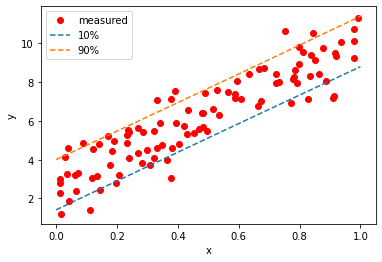

In [12]:
plt.plot(x,y,'ro', label='measured')
plt.plot(x1,ll,'--', label='10%')
plt.plot(x1,ul,'--', label='90%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
#plt.savefig('lin_regress.png')

## Polynomial regression
We can do the polynomial regression using the np.polyfit. This provides the fitted coefficients. We can define the order of polynomial as third argument to the np.polyfit function. First, we are generating a second degree polynomial (y = 1+2x-3x<sup>2</sup>), then we are adding noise into it.

In [13]:
#generate data
x = np.linspace(0,10)
y = 1 + 2*x - 3*x**2 + 15*np.random.randn(50)

In [14]:
# fit the polynomial
z = np.polyfit(x,y,2)
print(z)

[-3.23783204  4.88084577 -4.50530963]


The np.polyfit function is providing fitted polynomial as (y = 6.56 + 2.04 x - 2.99 x<sup>2</sup>), while the
coefficient of true polynomials were different. Only the third parameter is computed reasonably.
Other two parameters differs a lot compared to the true one. Let us look into the behaviour of
fitted polynomials compared to the true polynomial. np.poly1d function is used to evaluate the
polynomial using the fitted coefficient returned by np.polyfit.

In [15]:
# evaluate polynomial
p = np.poly1d(z)
z_true = np.array([-3, 2, 1]) # coefficient of true polynomial
p_true = np.poly1d(z_true) # true polynomial

Though the fitted coefficients differed than real coefficients, but the fitted polynomial is quiet close to the true one. The parameter associated with second degree was computed quiet reasonably by the np.polyfit, this means that this is the most sensitive parameters compared to other one.

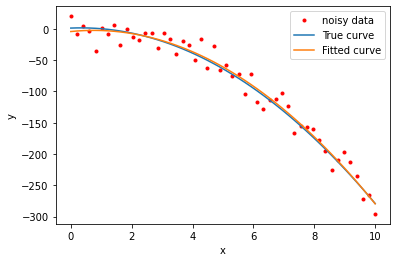

In [16]:
# plot
plt.plot(x, y,'.r', label='noisy data')
plt.plot(x, p_true(x), label='True curve')
plt.plot(x, p(x), label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.rcParams['figure.figsize'] = [6, 7] #change default plot size
#plt.savefig('poly_regress.png')